## KupiPai Data Parsing

The goal of this notebook is to parse the infromation (features) about the land lots that are showcased on a marketplace KupiPai (https://kupipai.com.ua/). The information about the lots is given there in the form of a map with hotspots representing each lot and their clusters (see the image below). The *requests* library is used to fetch the data

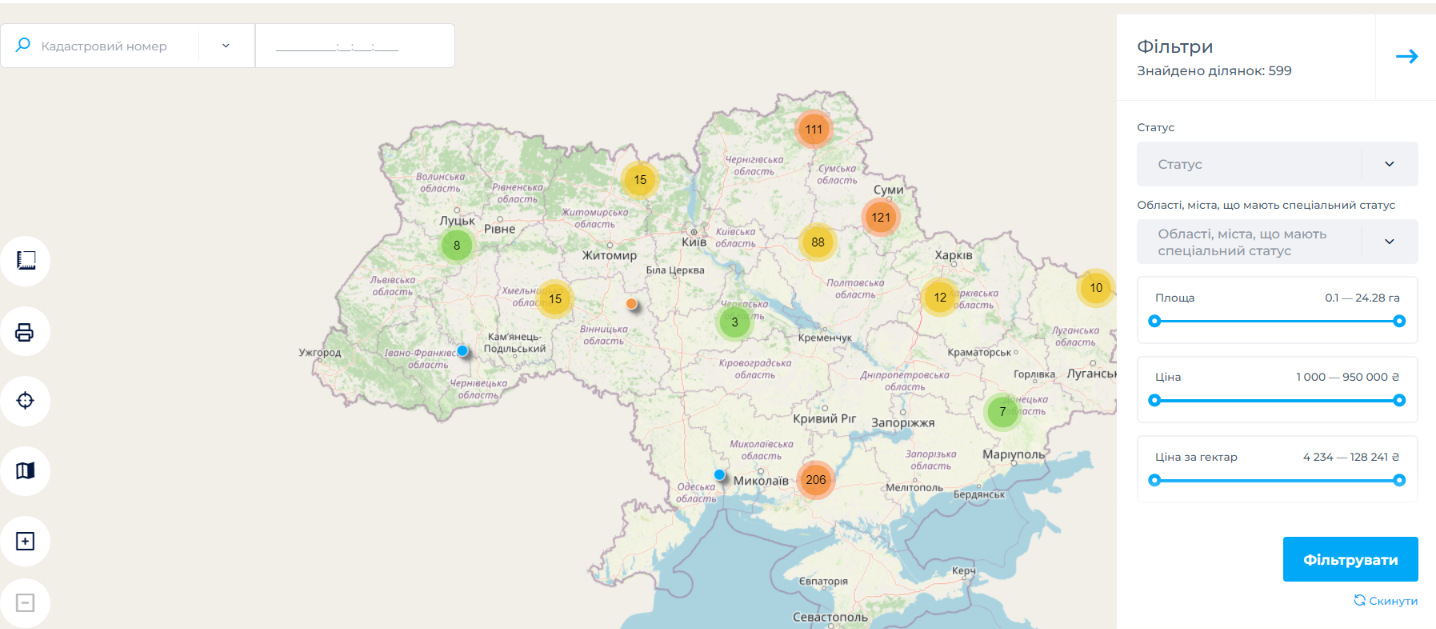

In [15]:
import requests
import csv

In [4]:
#Using Fetch/XHR and cURL converter to get the headers of the request

cookies = {
    '_ga': 'GA1.3.2062505831.1648385722',
    'csrftoken': 'wH2QemVtkQICEIMIGgt3cGYNTjSn0JPAzVUwB7LWXySu3S8ggyGkXiJLJe32BK3r',
    'sessionid': 'wshp2z646g0n1pwfgezeb66v53uumqge',
    '_gid': 'GA1.3.1583780479.1648824419',
    'current_currency': 'UAH',
    '_gat_UA-200319004-1': '1',
}


headers = {
    'authority': 'maps.googleapis.com',
    'sec-ch-ua': '" Not;A Brand";v="99", "Google Chrome";v="97", "Chromium";v="97"',
    'sec-ch-ua-mobile': '?0',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36',
    'sec-ch-ua-platform': '"Windows"',
    'accept': '*/*',
    'origin': 'https://kupipai.com.ua',
    'x-client-data': 'CJO2yQEIpbbJAQjBtskBCKmdygEI1tHKAQie+csBCOaEzAEI0o/MARiOnssB',
    'sec-fetch-site': 'cross-site',
    'sec-fetch-mode': 'cors',
    'sec-fetch-dest': 'empty',
    'accept-language': 'ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7',
}

params = (
    ('csp_test', 'true'),
)

response = requests.get('https://maps.googleapis.com/maps/api/mapsjs/gen_204', headers=headers, params=params, cookies=cookies)



In [41]:
response.json()

{'code': 200,
 'data': {'items': [{'id': 21,
    'name': 'Харківська',
    'level': 1410,
    'types': ['region'],
    'codes': {'KOATUU': ['6320000000', '6310000000', '6300000000'],
     'KATOTTG': ['UA63000000000041885']},
    'parentId': 1,
    'path': [1, 21]},
   {'id': 23,
    'name': 'Хмельницька',
    'level': 1410,
    'types': ['region'],
    'codes': {'KOATUU': ['6820000000', '6810000000', '6800000000'],
     'KATOTTG': ['UA68000000000099709']},
    'parentId': 1,
    'path': [1, 23]},
   {'id': 24,
    'name': 'Черкаська',
    'level': 1410,
    'types': ['region'],
    'codes': {'KOATUU': ['7110000000', '7100000000', '7120000000'],
     'KATOTTG': ['UA71000000000010357']},
    'parentId': 1,
    'path': [1, 24]},
   {'id': 3,
    'name': 'Вінницька',
    'level': 1410,
    'types': ['region'],
    'codes': {'KOATUU': ['0500000000', '0520000000', '0510000000'],
     'KATOTTG': ['UA05000000000010236']},
    'parentId': 1,
    'path': [1, 3]},
   {'id': 4,
    'name': 'Волинс

In [58]:
# Functions to fetch specific info about land lots with the help of Fetch/XHR and cUrl converter

# Function to fetch coordinates
def get_coords():
    
    
    headers = {
    'authority': 'kupipai.com.ua',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="99", "Google Chrome";v="99"',
    'accept-language': 'uk',
    'sec-ch-ua-mobile': '?0',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.84 Safari/537.36',
    'content-type': 'application/json',
    'x-requested-with': 'XMLHttpRequest',
    'x-csrftoken': 'wH2QemVtkQICEIMIGgt3cGYNTjSn0JPAzVUwB7LWXySu3S8ggyGkXiJLJe32BK3r',
    'sec-ch-ua-platform': '"Windows"',
    'accept': '*/*',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-mode': 'same-origin',
    'sec-fetch-dest': 'empty',
    'referer': 'https://kupipai.com.ua/profile/map/client',
    # Requests sorts cookies= alphabetically
    'cookie': '_ga=GA1.3.2062505831.1648385722; csrftoken=wH2QemVtkQICEIMIGgt3cGYNTjSn0JPAzVUwB7LWXySu3S8ggyGkXiJLJe32BK3r; sessionid=wshp2z646g0n1pwfgezeb66v53uumqge; _gid=GA1.3.1583780479.1648824419; current_currency=UAH; _gat_UA-200319004-1=1',
}

    response = requests.get('https://kupipai.com.ua/api/v1/announcement/map/list/', headers=headers, cookies=cookies)    
    return response.json()


def get_region_info():
    
    headers = {
    'authority': 'kupipai.com.ua',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="99", "Google Chrome";v="99"',
    'accept-language': 'uk',
    'sec-ch-ua-mobile': '?0',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.84 Safari/537.36',
    'content-type': 'application/json',
    'x-requested-with': 'XMLHttpRequest',
    'x-csrftoken': 'wH2QemVtkQICEIMIGgt3cGYNTjSn0JPAzVUwB7LWXySu3S8ggyGkXiJLJe32BK3r',
    'sec-ch-ua-platform': '"Windows"',
    'accept': '*/*',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-mode': 'same-origin',
    'sec-fetch-dest': 'empty',
    'referer': 'https://kupipai.com.ua/profile/map/client',
    # Requests sorts cookies= alphabetically
    'cookie': '_ga=GA1.3.2062505831.1648385722; csrftoken=wH2QemVtkQICEIMIGgt3cGYNTjSn0JPAzVUwB7LWXySu3S8ggyGkXiJLJe32BK3r; sessionid=wshp2z646g0n1pwfgezeb66v53uumqge; _gid=GA1.3.1583780479.1648824419; current_currency=UAH; _gat_UA-200319004-1=1',
}

    response = requests.get('https://kupipai.com.ua/api/v1/geo/divisions/hierarchy/', headers=headers, cookies=cookies)
    return response.json()

def get_filters():
    headers = {
        'authority': 'kupipai.com.ua',
        'sec-ch-ua': '" Not;A Brand";v="99", "Google Chrome";v="97", "Chromium";v="97"',
        'accept-language': 'uk',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36',
        'content-type': 'application/json',
        'x-requested-with': 'XMLHttpRequest',
        'x-csrftoken': 'cJNYzrq4JOhZ0I3S1GmsM62icH4fzWSZ2XGbnZDqsVCHjZGE04gF2vCcvscZKYlV',
        'sec-ch-ua-platform': '"Windows"',
        'accept': '*/*',
        'origin': 'https://kupipai.com.ua',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'same-origin',
        'sec-fetch-dest': 'empty',
        'referer': 'https://kupipai.com.ua/profile/map/client',
        'cookie': '_ga=GA1.3.2062505831.1648385722; csrftoken=wH2QemVtkQICEIMIGgt3cGYNTjSn0JPAzVUwB7LWXySu3S8ggyGkXiJLJe32BK3r; sessionid=wshp2z646g0n1pwfgezeb66v53uumqge; _gid=GA1.3.1583780479.1648824419; current_currency=UAH; _gat_UA-200319004-1=1'
        #'cookie': '_ga=GA1.3.215861135.1641581486; _gid=GA1.3.354005671.1641581486; csrftoken=cJNYzrq4JOhZ0I3S1GmsM62icH4fzWSZ2XGbnZDqsVCHjZGE04gF2vCcvscZKYlV; sessionid=o16mawmwscp5r623cxwrgvd8t5gojrww; current_currency=UAH; _gat_UA-200319004-1=1',
    }

    response = requests.options('https://kupipai.com.ua/api/v1/announcement/map/list/', headers=headers, cookies=cookies)
    return response.json()

def get_one_lot(lot_id):
    headers = {
        'authority': 'kupipai.com.ua',
        'sec-ch-ua': '" Not;A Brand";v="99", "Google Chrome";v="97", "Chromium";v="97"',
        'accept-language': 'uk',
        'sec-ch-ua-mobile': '?0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36',
        'content-type': 'application/json',
        'x-requested-with': 'XMLHttpRequest',
        'x-csrftoken': 'cJNYzrq4JOhZ0I3S1GmsM62icH4fzWSZ2XGbnZDqsVCHjZGE04gF2vCcvscZKYlV',
        'sec-ch-ua-platform': '"Windows"',
        'accept': '*/*',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'same-origin',
        'sec-fetch-dest': 'empty',
        'referer': 'https://kupipai.com.ua/profile/map/client',
        'cookie': '_ga=GA1.3.2062505831.1648385722; csrftoken=wH2QemVtkQICEIMIGgt3cGYNTjSn0JPAzVUwB7LWXySu3S8ggyGkXiJLJe32BK3r; sessionid=wshp2z646g0n1pwfgezeb66v53uumqge; _gid=GA1.3.1583780479.1648824419; current_currency=UAH; _gat_UA-200319004-1=1'
        #'cookie': '_ga=GA1.3.215861135.1641581486; _gid=GA1.3.354005671.1641581486; csrftoken=cJNYzrq4JOhZ0I3S1GmsM62icH4fzWSZ2XGbnZDqsVCHjZGE04gF2vCcvscZKYlV; sessionid=o16mawmwscp5r623cxwrgvd8t5gojrww; current_currency=UAH',
    }

    response = requests.get(f'https://kupipai.com.ua/api/v1/announcement/{lot_id}/retrieve-update/', headers=headers, cookies=cookies)
    return response.json()['data']['item']


'headers = {\n    \'authority\': \'kupipai.com.ua\',\n    \'sec-ch-ua\': \'" Not A;Brand";v="99", "Chromium";v="99", "Google Chrome";v="99"\',\n    \'accept-language\': \'uk\',\n    \'sec-ch-ua-mobile\': \'?0\',\n    \'user-agent\': \'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.84 Safari/537.36\',\n    \'content-type\': \'application/json\',\n    \'x-requested-with\': \'XMLHttpRequest\',\n    \'x-csrftoken\': \'wH2QemVtkQICEIMIGgt3cGYNTjSn0JPAzVUwB7LWXySu3S8ggyGkXiJLJe32BK3r\',\n    \'sec-ch-ua-platform\': \'"Windows"\',\n    \'accept\': \'*/*\',\n    \'sec-fetch-site\': \'same-origin\',\n    \'sec-fetch-mode\': \'same-origin\',\n    \'sec-fetch-dest\': \'empty\',\n    \'referer\': \'https://kupipai.com.ua/profile/map/client\',\n    # Requests sorts cookies= alphabetically\n    # \'cookie\': \'_ga=GA1.3.2062505831.1648385722; csrftoken=wH2QemVtkQICEIMIGgt3cGYNTjSn0JPAzVUwB7LWXySu3S8ggyGkXiJLJe32BK3r; sessionid=wshp2z646g0n1pwfgezeb6

In [24]:
# Getting coordinates of the lots
coords = get_coords()

In [25]:
coords

{'code': 200,
 'data': {'items': [[928, [49.60874019990241, 26.896348603310503], False],
   [927, [47.10786674807149, 33.26792979274303], True],
   [926, [50.118210319905636, 33.23476427493649], True],
   [925, [46.506789215639664, 33.32081464281258], True],
   [924, [46.50486227464972, 33.32131589270757], True],
   [923, [46.21383935628381, 33.55139491154393], True],
   [922, [46.73118197078126, 33.9590567962141], True],
   [921, [46.20842700488597, 33.56664432665958], True],
   [920, [52.086382076063224, 31.663247314858722], True],
   [919, [51.515046910020274, 32.62610948338785], True],
   [918, [51.54922093347802, 32.71829444701267], True],
   [917, [51.517123939720754, 32.732687956396255], True],
   [916, [52.00732268412732, 33.358960039367304], True],
   [915, [51.28997946585824, 33.02237674522153], True],
   [914, [51.290052596289186, 33.02178984496405], True],
   [913, [51.29150732444304, 32.99949737235313], True],
   [912, [51.29108618326261, 33.000495317935965], True],
   [91

In [21]:
coords['data']['items'][0][1]

[50.98133733534587, 29.917473526257876]

In [46]:
len(coords['data']['items'])

476

In [46]:
regions = get_region_info()

In [47]:
regions

{'code': 200,
 'data': {'items': [{'id': 21,
    'name': 'Харківська',
    'level': 1410,
    'types': ['region'],
    'codes': {'KOATUU': ['6320000000', '6310000000', '6300000000'],
     'KATOTTG': ['UA63000000000041885']},
    'parentId': 1,
    'path': [1, 21]},
   {'id': 23,
    'name': 'Хмельницька',
    'level': 1410,
    'types': ['region'],
    'codes': {'KOATUU': ['6820000000', '6810000000', '6800000000'],
     'KATOTTG': ['UA68000000000099709']},
    'parentId': 1,
    'path': [1, 23]},
   {'id': 24,
    'name': 'Черкаська',
    'level': 1410,
    'types': ['region'],
    'codes': {'KOATUU': ['7110000000', '7100000000', '7120000000'],
     'KATOTTG': ['UA71000000000010357']},
    'parentId': 1,
    'path': [1, 24]},
   {'id': 3,
    'name': 'Вінницька',
    'level': 1410,
    'types': ['region'],
    'codes': {'KOATUU': ['0500000000', '0520000000', '0510000000'],
     'KATOTTG': ['UA05000000000010236']},
    'parentId': 1,
    'path': [1, 3]},
   {'id': 4,
    'name': 'Волинс

In [48]:
# One test region lookup
regions['data']['items'][0]['name']

'Харківська'

In [50]:
# Fetching coordinates of a particular lot
for item in coords['data']['items']:
    if item[0] == 650:
        print(item)

[650, [49.7154269411052, 27.674173302900954], False]


In [59]:
# Fetching one test lot
one_lot = get_one_lot(740)

In [60]:
one_lot

{'id': 740,
 'status': 3,
 'statusDisplay': 'Активне',
 'identifier': 'AD-30122021-740',
 'description': None,
 'cadastre': '3222055100:02:003:0298',
 'currency': 'UAH',
 'price': 90000,
 'basePrice': 90000,
 'pricePerOne': 45852,
 'basePricePerOne': 45852,
 'estimatePrice': 42477,
 'estimateDate': '2021-12-28',
 'lastRentPayDate': '2021-12-31',
 'rentRate': 3812,
 'baseRentRate': 3812,
 'rentRateClean': 3069,
 'baseRentRateClean': 3069,
 'rentalYield': '3.4',
 'rentPeriod': '15',
 'area': 1.9628,
 'purpose': '01.01 Для ведення товарного сільськогосподарського виробництва',
 'ownership': 'Приватна власність',
 'koatuuLocation': 'Іванків, Іванківська, Вишгородський, Київська, Україна',
 'geoPath': [1, 11, 91, 1058, 13168],
 'geoLocation': 'SRID=4326;POINT (50.98133733534587 29.91747352625788)',
 'geoCoordinates': [50.98133733534587, 29.917473526257876],
 'ownerType': 1,
 'ownerEdrpou': '3578305088',
 'ownerName': 'Осипенко Вікторія Вікторівна',
 'ownerPhone': '+380967693202',
 'renterCo

In [61]:
lot_list = []

In [62]:
# Creatin a list of parsed items
for item in coords['data']['items']:
    #print(get_one_lot(item[0]))
    lot_list.append(get_one_lot(item[0]))

In [63]:
len(lot_list)

599

In [64]:
lot_list

[{'id': 928,
  'status': 4,
  'statusDisplay': 'В процесі укладання угоди купівлі-продажу',
  'identifier': 'AD-21022022-928',
  'description': None,
  'cadastre': '6822787400:02:002:0006',
  'currency': 'UAH',
  'price': 183000,
  'basePrice': 183000,
  'pricePerOne': 66186,
  'basePricePerOne': 66186,
  'estimatePrice': 91388,
  'estimateDate': '2021-10-30',
  'lastRentPayDate': '2021-12-31',
  'rentRate': 12609,
  'baseRentRate': 12609,
  'rentRateClean': 10150,
  'baseRentRateClean': 10150,
  'rentalYield': '5.5',
  'rentPeriod': '10',
  'area': 2.7649,
  'purpose': '01.01 Для ведення товарного сільськогосподарського виробництва',
  'ownership': 'Приватна власність',
  'koatuuLocation': 'Красилівська, Хмельницький, Хмельницька, Україна',
  'geoPath': [1, 23, 153, 1743],
  'geoLocation': 'SRID=4326;POINT (49.60874019990241 26.8963486033105)',
  'geoCoordinates': [49.60874019990241, 26.896348603310503],
  'ownerType': 1,
  'ownerEdrpou': '2856419271',
  'ownerName': 'ООмелянчук Олекс

In [94]:
# Saving parsed data to csv
with open('land_lots.csv', 'w', encoding='utf8', newline='') as output_file:
    fc = csv.DictWriter(output_file, 
                        fieldnames=lot_list[0].keys(),

                       )
    fc.writeheader()
    fc.writerows(lot_list)